In [1]:
import perfume
import perfume.analyze
import pandas as pd
import bokeh.io
bokeh.io.output_notebook()

Loading BokehJS ...

Loading BokehJS ...

In [2]:
import time
import numpy as np

def test_function_1():
    good = np.random.poisson(20)
    bad = np.random.poisson(100)
    msec = np.random.choice([good, bad], p=[.99, .01])
    time.sleep(msec / 3000.)

def test_function_2():
    good = np.random.poisson(5)
    bad = np.random.poisson(150)
    msec = np.random.choice([good, bad], p=[.95, .05])
    time.sleep(msec / 3000.)

def test_function_3():
    msec = max(1, np.random.normal(100, 10))
    time.sleep(msec / 3000.)

numbers = np.arange(0, 1, 1. / (3 * 5000000))

def test_function_4():
    return np.sum(numbers)

samples = None

In [3]:
samples = perfume.bench(test_function_1, test_function_2, test_function_3, test_function_4,
                        efficiency=0.8, samples=samples)

function,test_function_1,test_function_2,test_function_3,test_function_4
count,130.000000,130.000000,130.000000,130.000000
mean,6.776683,5.253204,32.970949,11.628137
std,1.367558,12.303317,3.284734,1.869291
min,3.926018,0.564420,23.395807,7.957820
25%,5.819199,1.274697,30.753880,10.417264
50%,6.633318,1.935262,33.021429,11.783308
75%,7.586332,2.573899,35.206814,12.789111
max,10.610268,55.219949,41.103090,18.031121


In [4]:
perfume.analyze.cumulative_quantiles_plot(samples)

In [5]:
timings = perfume.analyze.timings(samples)
isolated = perfume.analyze.isolate(samples)
isolated.head()

function test_function_1            test_function_2             \
timing             begin        end           begin        end   
0               0.000000   8.214457        0.000000   2.264912   
1               8.214457  13.130141        2.264912   4.180262   
2              13.130141  20.370834        4.180262   5.795308   
3              20.370834  25.964884        5.795308   7.050999   
4              25.964884  35.202713        7.050999  10.367407   

function test_function_3             test_function_4             
timing             begin         end           begin        end  
0               0.000000   36.061888        0.000000  10.017141  
1              36.061888   66.807881       10.017141  19.590994  
2              66.807881   96.025680       19.590994  30.005550  
3              96.025680  134.079855       30.005550  40.494671  
4             134.079855  168.950218       40.494671  53.120426

function,test_function_1,test_function_2,test_function_3,test_function_4
count,132.000000,132.000000,132.000000,132.000000
mean,6.798778,5.202619,32.987515,11.650048
std,1.368808,12.215963,3.305752,1.868144
min,3.926018,0.564420,23.395807,7.957820
25%,5.866976,1.280549,30.749779,10.422680
50%,6.639363,1.935262,33.021429,11.803287
75%,7.591306,2.565207,35.245369,12.836817
max,10.610268,55.219949,41.103090,18.031121


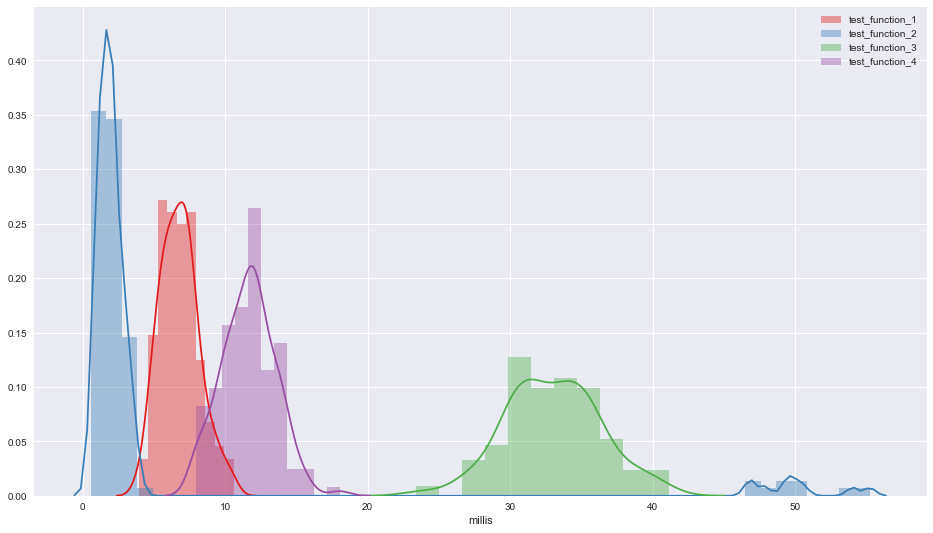

In [6]:
from bokeh import palettes
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(16, 9))
for col, color in zip(timings.columns, palettes.Set1[len(timings.columns)]):
    sns.distplot(timings[col], label=col, color=color, ax=ax)
ax.set_xlabel('millis')
ax.legend()
timings.describe()

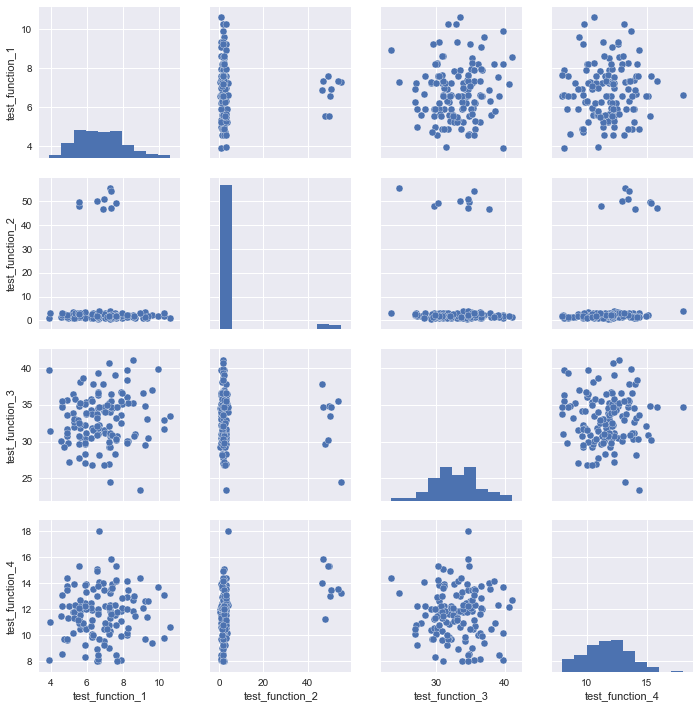

In [7]:
sns.pairplot(timings)